In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the cleaned dataset
data = pd.read_csv('data_cleaned.csv')  # or your correct filename
print(data.shape)
data.head()


(1700, 18)


,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4.099473e+06
1,ARE,1991,1594.0,0.076475,245.977706,12262.388130,57010.849,29.851550,598.807980,26.377204,0.266886,3.391964e+10,19340.0,20.5,5.442852,1909812.0,5.265704,1.507988e+06
2,ARG,1991,2666.1,1.285579,173.122857,1434.960601,117021.304,3.536073,426.614517,39.119646,4.772468,1.897200e+11,3960.0,25.8,1.372593,33093579.0,1.762636,2.890393e+07
3,AUS,1991,1603.3,1.306912,208.686644,4926.727783,281530.258,16.288490,689.948873,60.356798,7.915273,3.299655e+11,18380.0,8.6,1.274577,17284000.0,1.438378,1.478473e+07
4,AUT,1991,5463.0,0.209142,128.939160,3381.073790,65888.656,8.448456,322.186648,19.746121,20.991143,1.721664e+11,21200.0,8.9,1.134999,7798899.0,1.134999,5.131676e+06


In [2]:
print("Available columns and their data types:")
print(data.dtypes)

print("\nDescriptive statistics:")
print(data.describe().T)


Available columns and their data types:
country                 object
year                     int64
cereal_yield           float64
fdi_perc_gdp           float64
en_per_gdp             float64
en_per_cap             float64
co2_ttl                float64
co2_per_cap            float64
co2_per_gdp            float64
pop_urb_aggl_perc      float64
prot_area_perc         float64
gdp                    float64
gni_per_cap            float64
under_5_mort_rate      float64
pop_growth_perc        float64
pop                    float64
urb_pop_growth_perc    float64
urb_pop                float64
dtype: object

Descriptive statistics:
                      count          mean           std           min  \
year                 1700.0  1.999571e+03  5.143070e+00  1.991000e+03   
cereal_yield         1700.0  3.013318e+03  1.796206e+03  1.757000e+02   
fdi_perc_gdp         1700.0  2.948940e+00  3.949722e+00 -1.502768e+01   
en_per_gdp           1700.0  2.498227e+02  1.861950e+02  6.633537e+01  

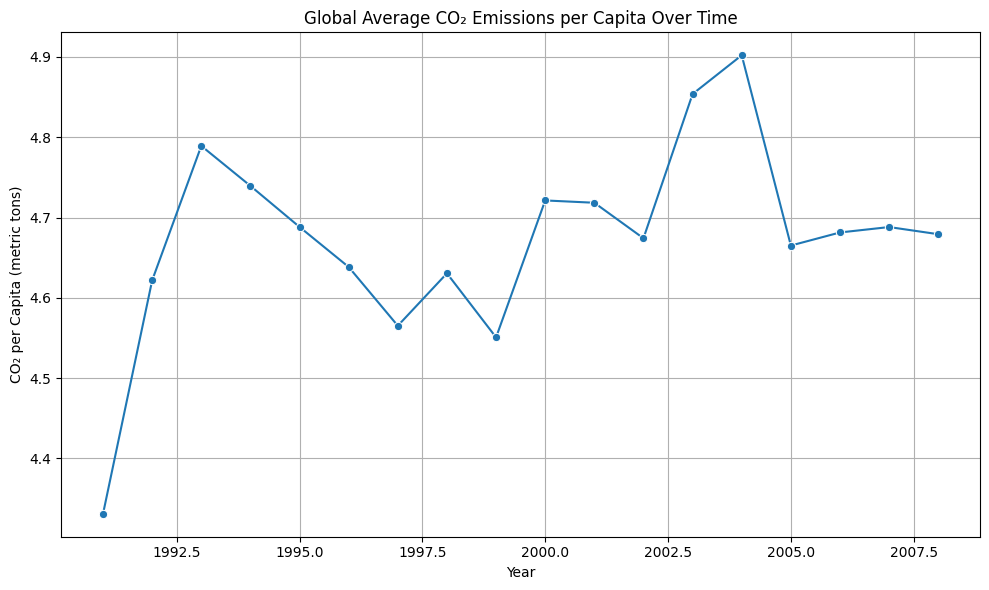

In [3]:
df_yearly_avg = data.groupby('year')['co2_per_cap'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_yearly_avg, x='year', y='co2_per_cap', marker='o')
plt.title('Global Average CO₂ Emissions per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.grid(True)
plt.tight_layout()
plt.show()


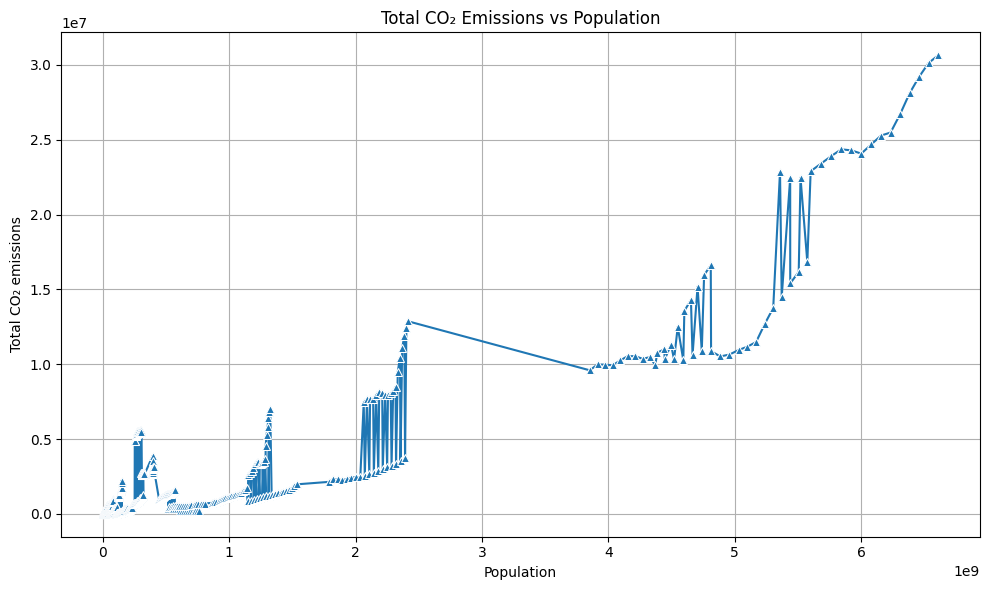

In [4]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='pop', y='co2_ttl', marker='^')
plt.title('Total CO₂ Emissions vs Population')
plt.xlabel('Population')
plt.ylabel('Total CO₂ emissions')
plt.grid(True)
plt.tight_layout()
plt.show()



In [5]:
data['en_ttl'] = data['en_per_gdp'] * data['gdp'] / 1000


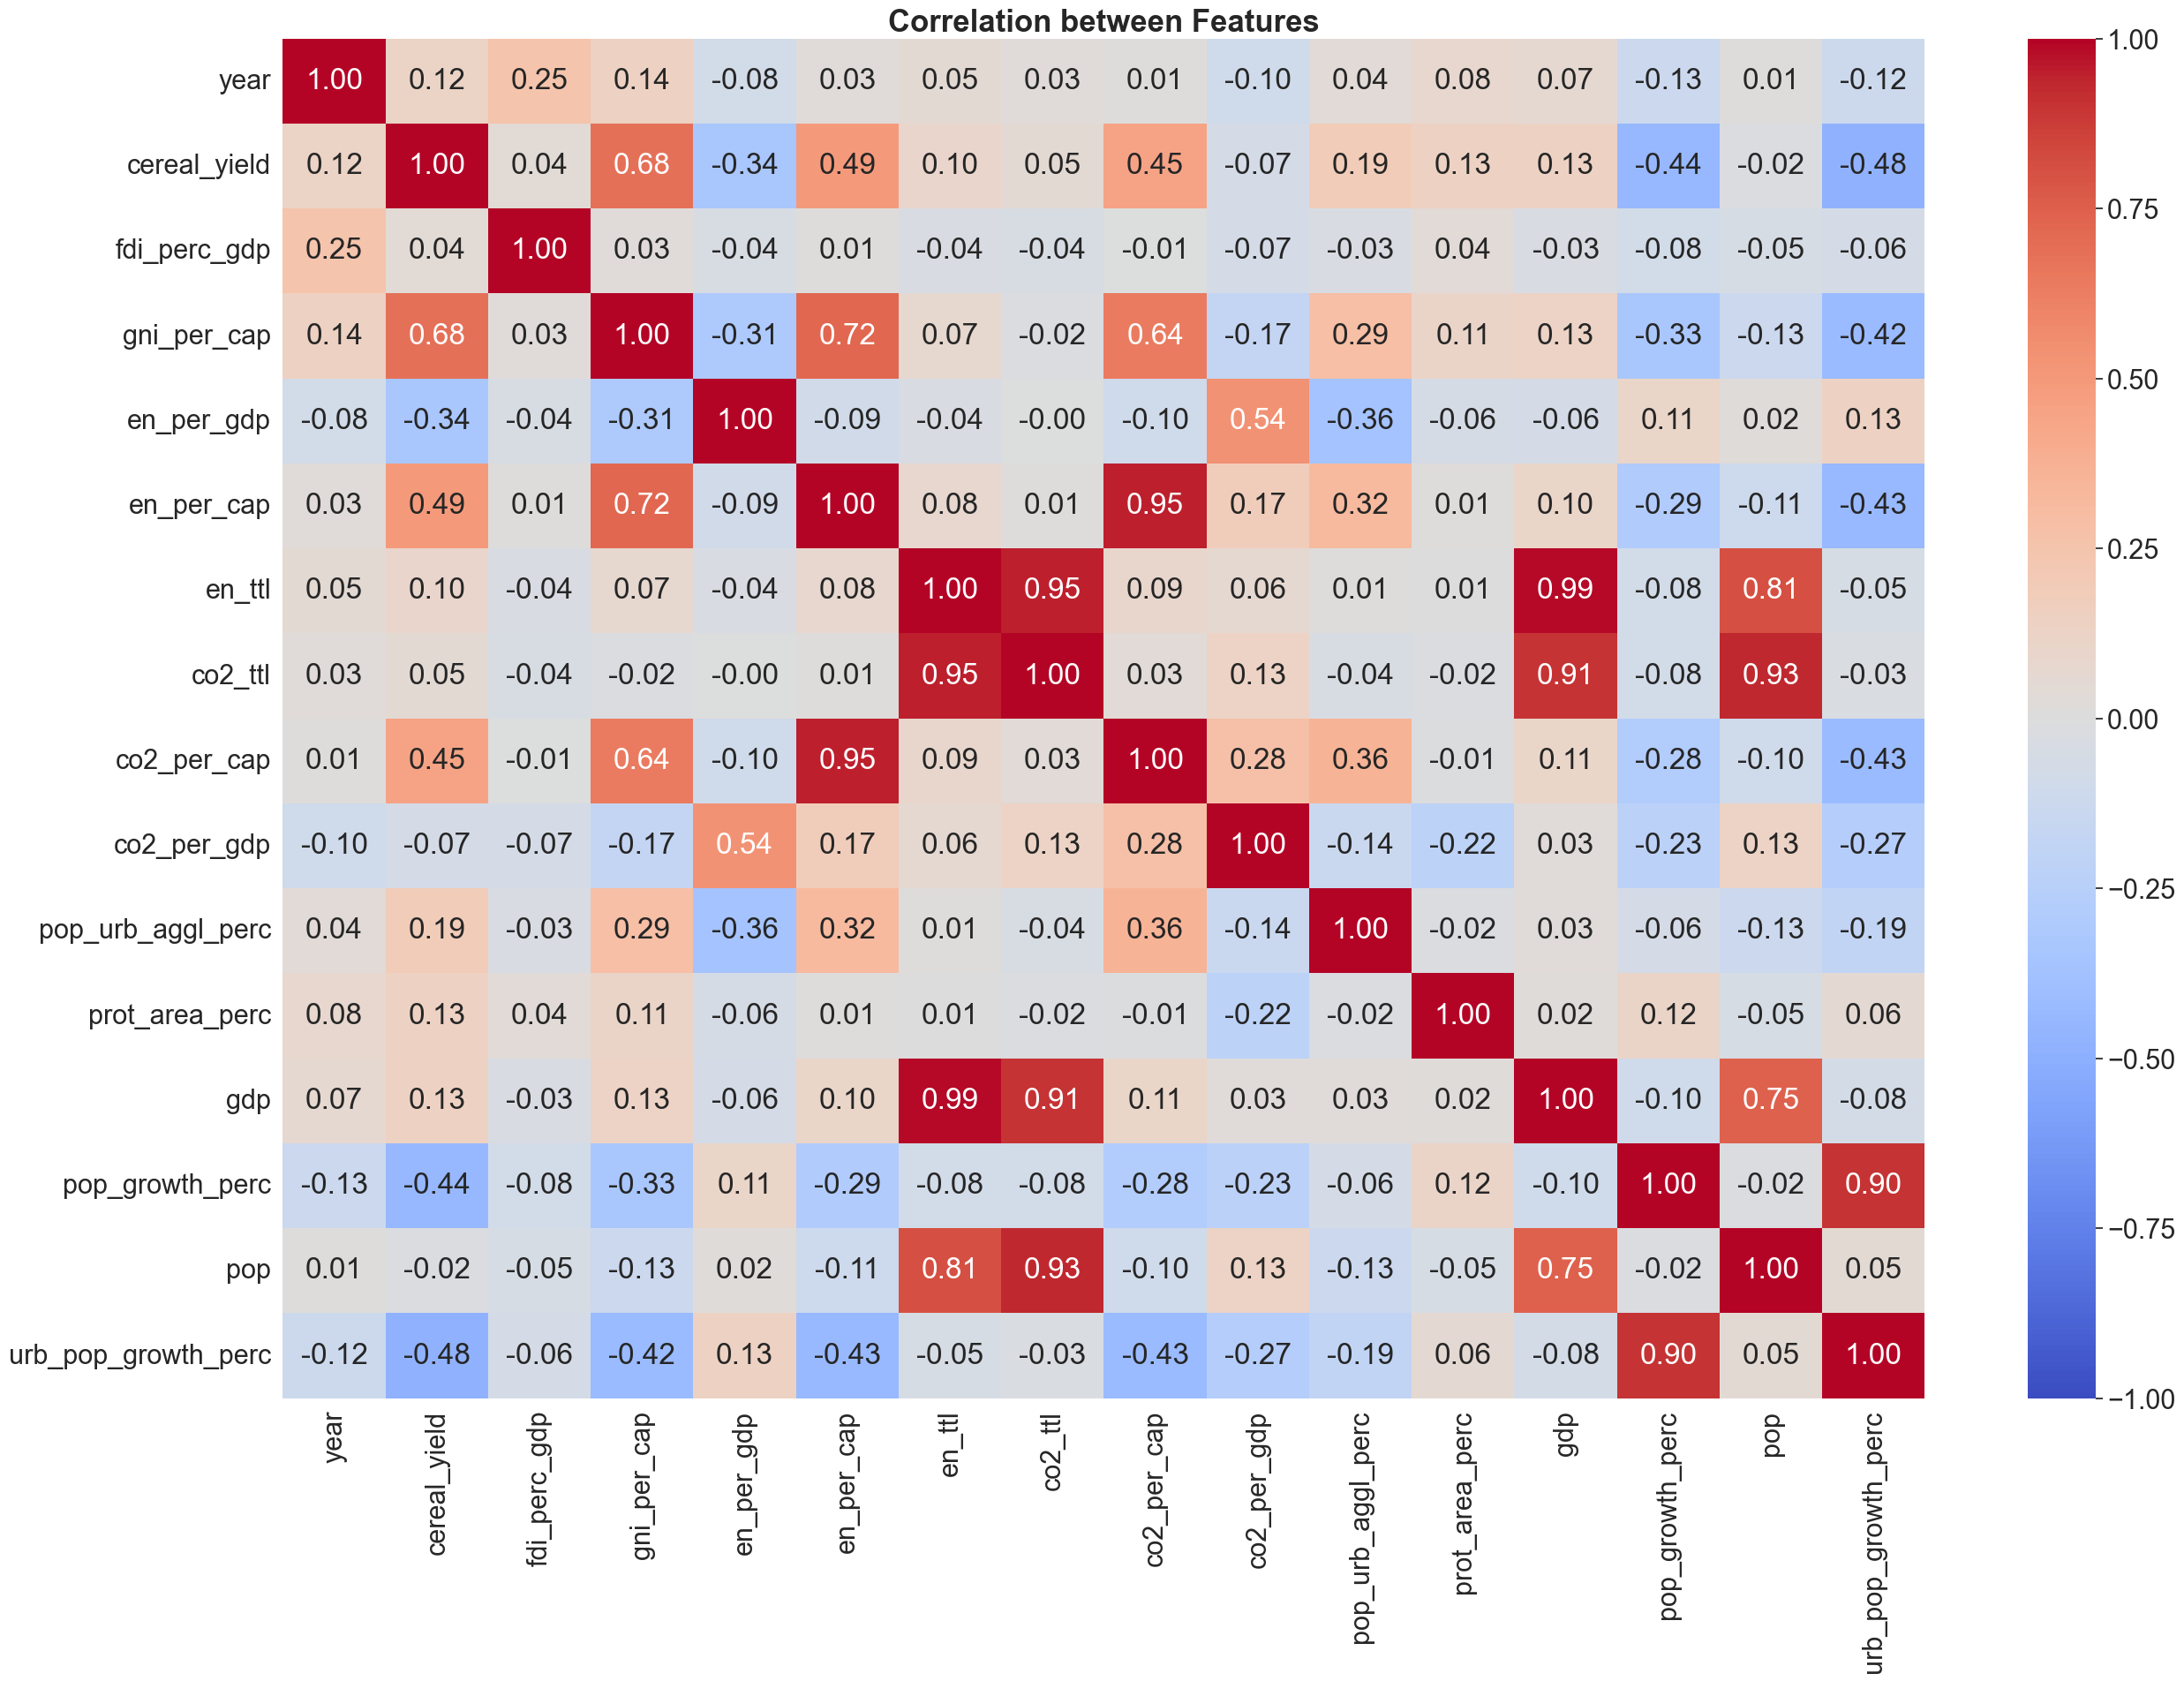

In [6]:
features_all = data[['country','year','cereal_yield','fdi_perc_gdp','gni_per_cap',
                     'en_per_gdp', 'en_per_cap', 'en_ttl', 'co2_ttl', 'co2_per_cap',
                     'co2_per_gdp', 'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',
                     'pop_growth_perc', 'pop', 'urb_pop_growth_perc']]

sns.set_theme(font_scale=2)
plt.figure(figsize=(30, 20))
sns.heatmap(features_all.drop(['country'], axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation between Features', fontsize=25, weight='bold')
plt.show()


In [7]:
features_for_vif = data[['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                         'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]

vif_data = pd.DataFrame()
vif_data["feature"] = features_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i)
                   for i in range(features_for_vif.shape[1])]
print(vif_data)


               feature        VIF
0         cereal_yield   1.528133
1         fdi_perc_gdp   0.971334
2          gni_per_cap   2.910812
3           en_per_cap  12.579371
4          co2_per_cap  10.762323
5    pop_urb_aggl_perc   0.979676
6       prot_area_perc   1.022400
7                  gdp   1.106440
8      pop_growth_perc   6.336530
9  urb_pop_growth_perc   5.808288


In [8]:
labels_dict = {
    'gni_per_cap':'GNI per capita [Atlas $]',
    'gdp':'Gross Domestic Product [$]',
    'cereal_yield':'Cereal yield [kg/ha]',
    'prot_area_perc': 'Protected areas [%]',
    'fdi_perc_gdp': 'FDI [% of GDP]',
    'pop_urb_aggl_perc': 'Urban agglomerations >1M [%]',
    'urb_pop_growth_perc':'Urban pop growth [%]',
    'pop_growth_perc': 'Population growth [%]',
    'co2_per_cap':'CO2 per capita [t]',
    'en_per_cap':'Energy use per capita [kg oil eq]'
}


C:\Users\madhu\AppData\Local\Temp\ipykernel_16788\2840082699.py:11: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\madhu\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


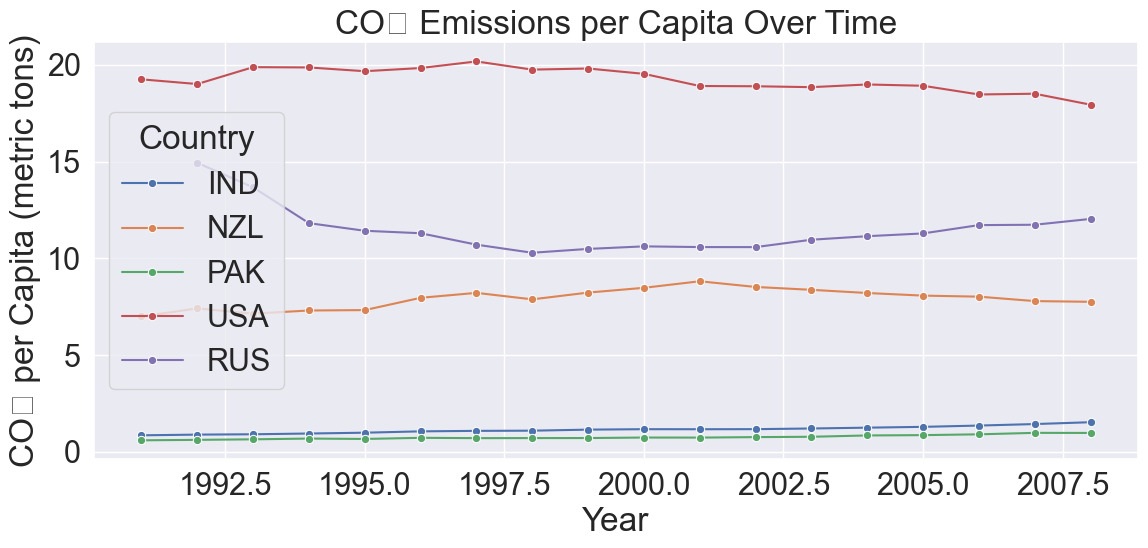

In [9]:
selected_countries = ['IND', 'USA', 'PAK', 'RUS', 'NZL']
df_selected = data[data['country'].isin(selected_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='year', y='co2_per_cap', hue='country', marker='o')
plt.title('CO₂ Emissions per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
chosen_countries = ['IND', 'USA', 'PAK', 'RUS', 'NZL']
features_chosen = features_all[features_all['country'].isin(chosen_countries)]

sns.set_theme(font_scale=1.3)
sns.pairplot(data=features_chosen, hue='country')


In [ ]:
feature_cols = ['country', 'cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap',
                'pop_urb_aggl_perc','prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc', 'co2_per_cap']

features_for_plot = data[feature_cols].copy()
features_for_plot = features_for_plot[features_for_plot['country']!='ARE']

sns.set_theme(style="whitegrid", font_scale=2)
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

g = sns.relplot(
    data=features_for_plot,
    x="urb_pop_growth_perc", y="co2_per_cap",
    hue="en_per_cap", size="pop_urb_aggl_perc",
    palette=cmap, sizes=(10, 200),
    height=10, aspect=4/3
)

g.ax.set_xlabel(labels_dict['urb_pop_growth_perc'])
g.ax.set_ylabel(labels_dict['co2_per_cap'])
